K2-18 - one failed guide star, a few failed extractions

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [17]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/'

In [21]:
x1ds = np.hstack((glob.glob('{}*x1d.fits'.format(path)), glob.glob('{}*sx1.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/ocy721010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/ocy721020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/ocy721030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/ocy721040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/oeoo18020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/oeoo18030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/oeoo18040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/oeoo38010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/ocy711010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/ocy711020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/oeoo18050_sx1.fits'],
      dtype='<U65')

/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/ocy721010_x1d.fits
G140M
556.3479


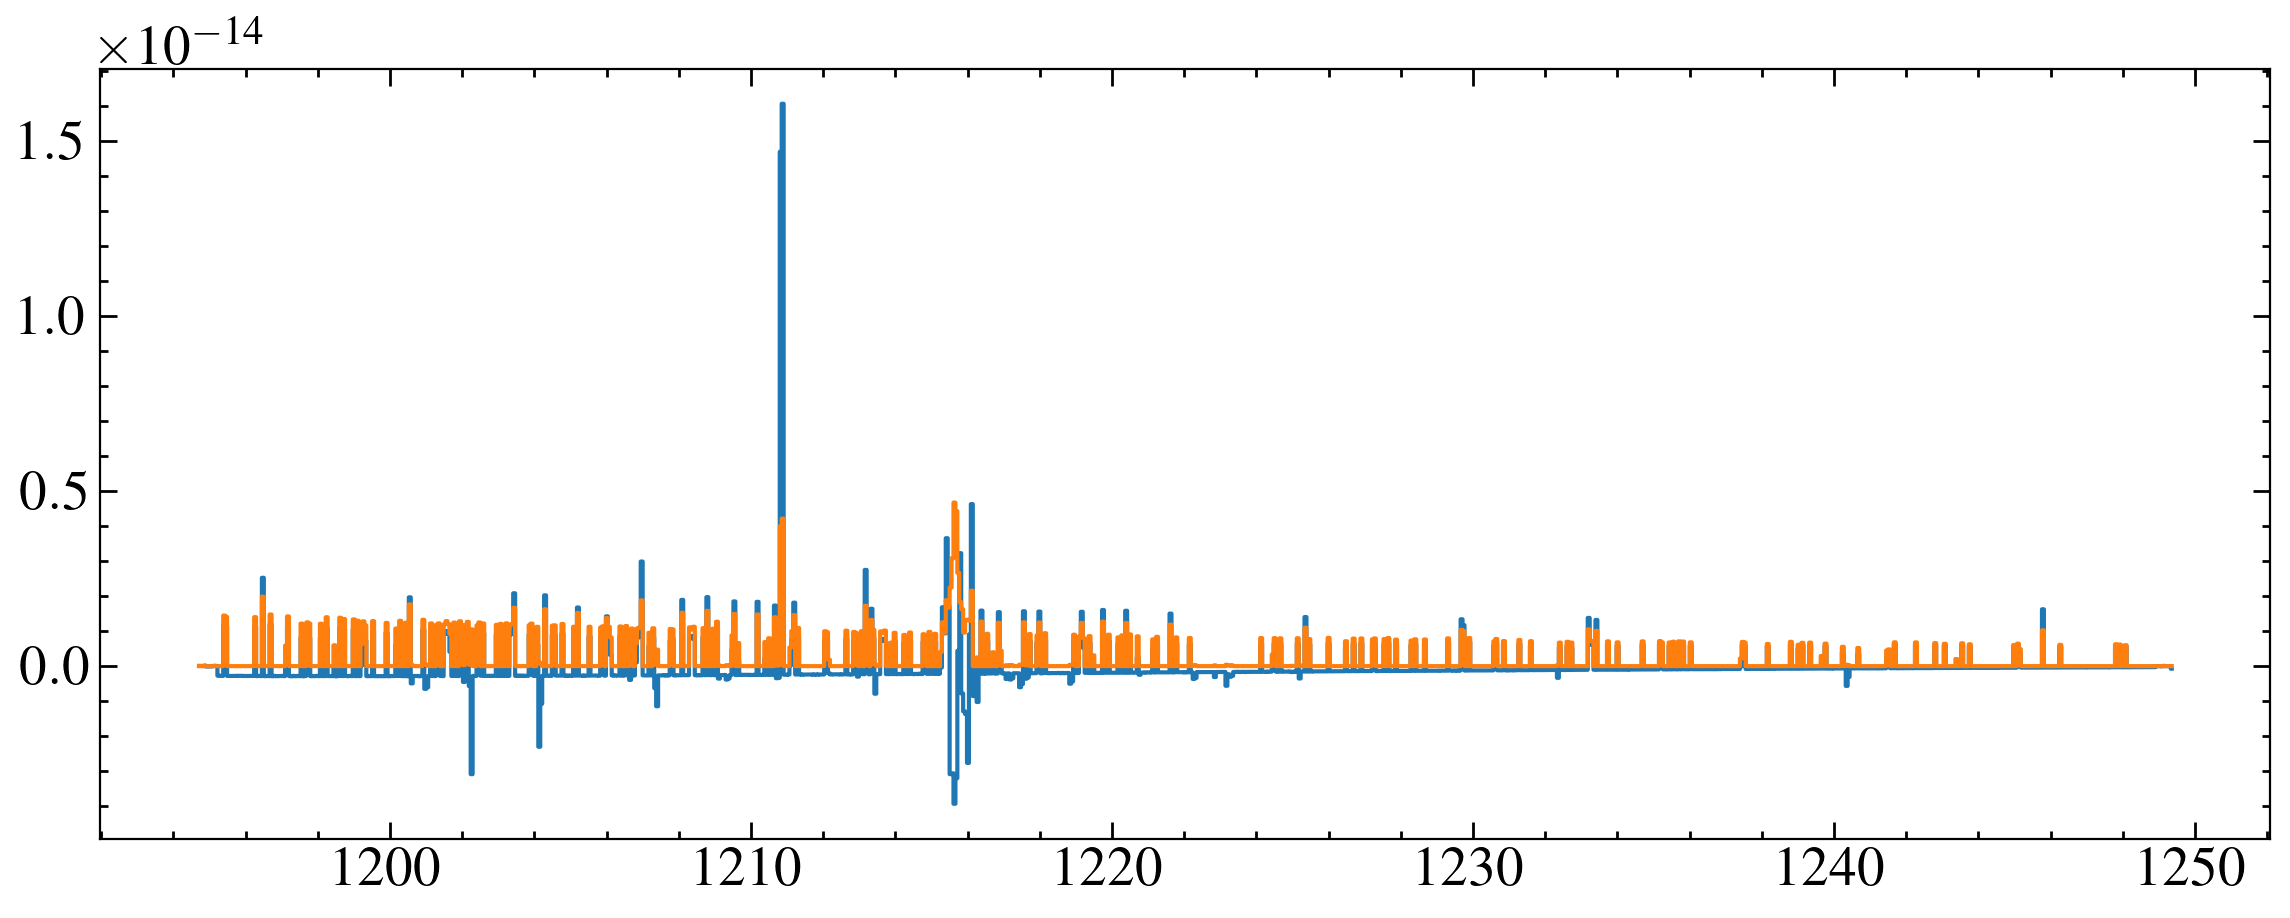

/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/ocy721020_x1d.fits
G140M
554.9332


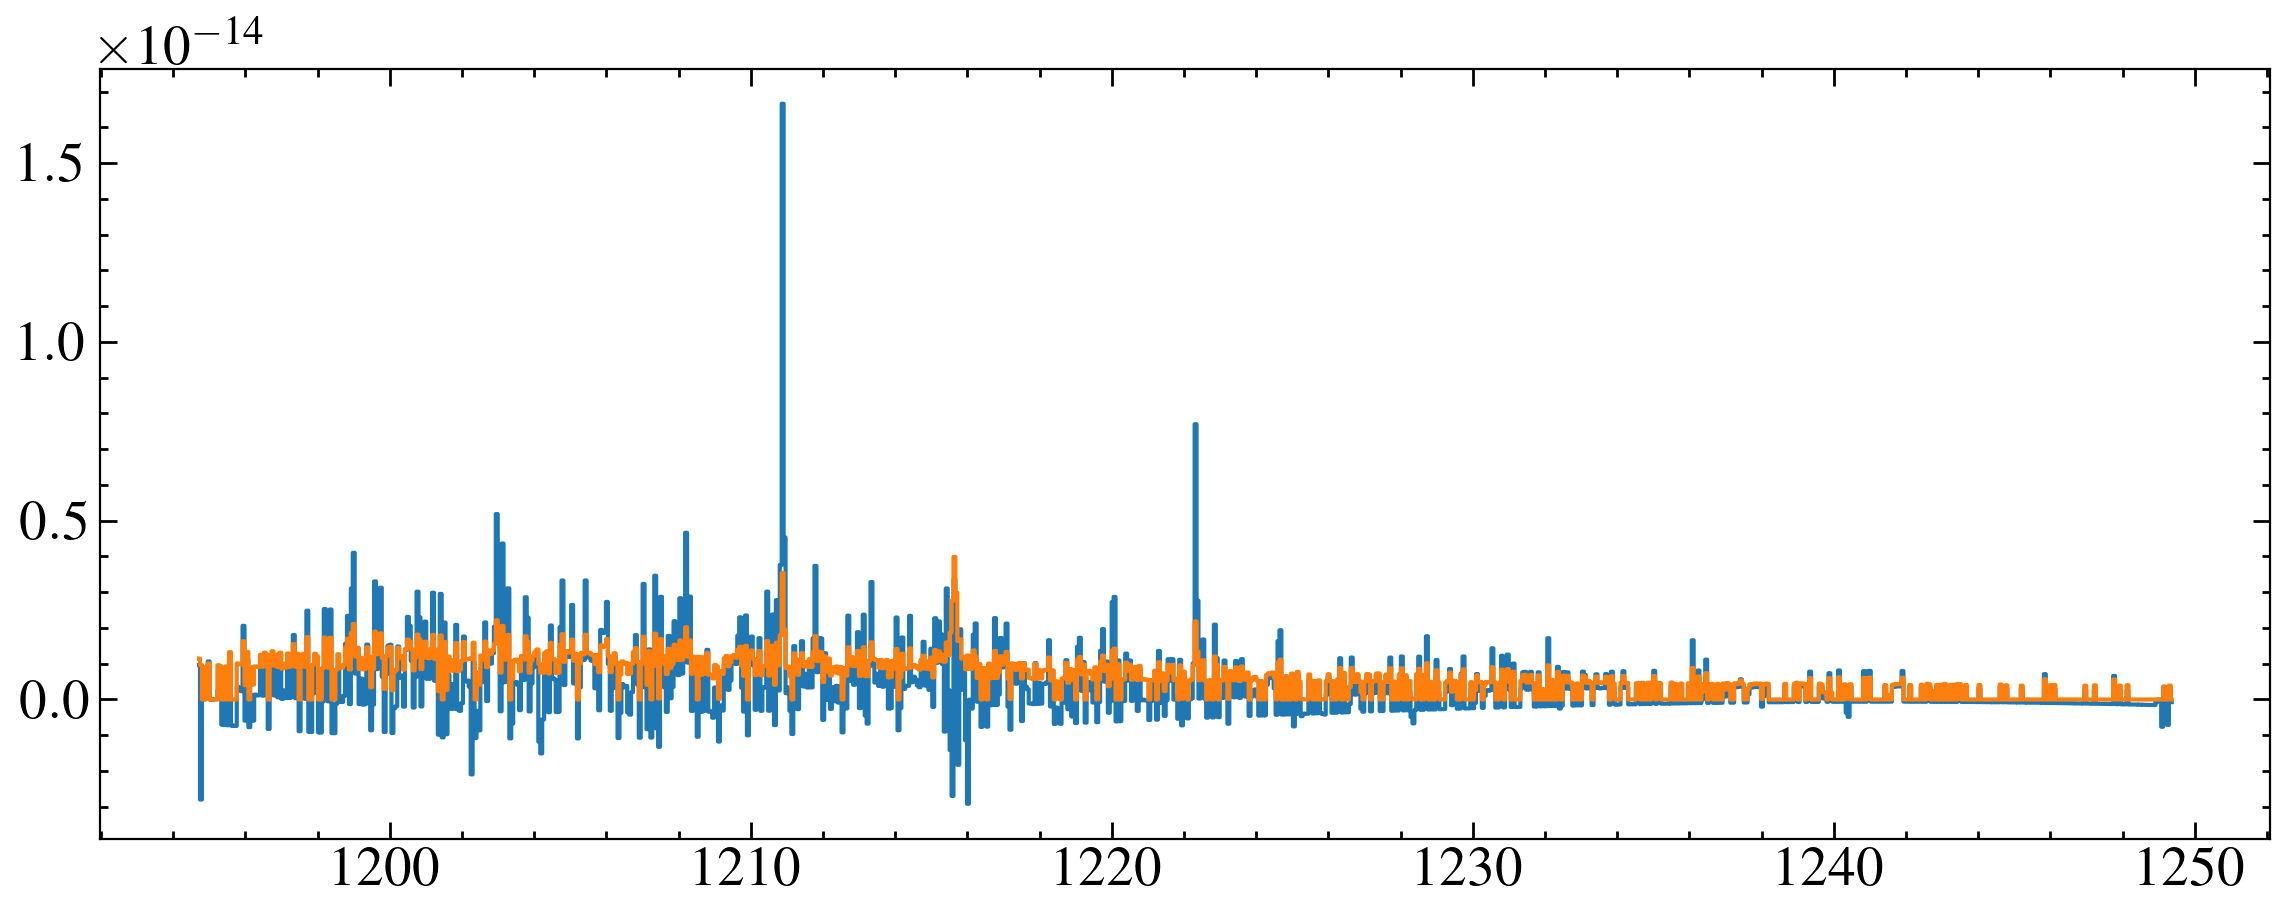

/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/ocy721030_x1d.fits
G140M
555.46606


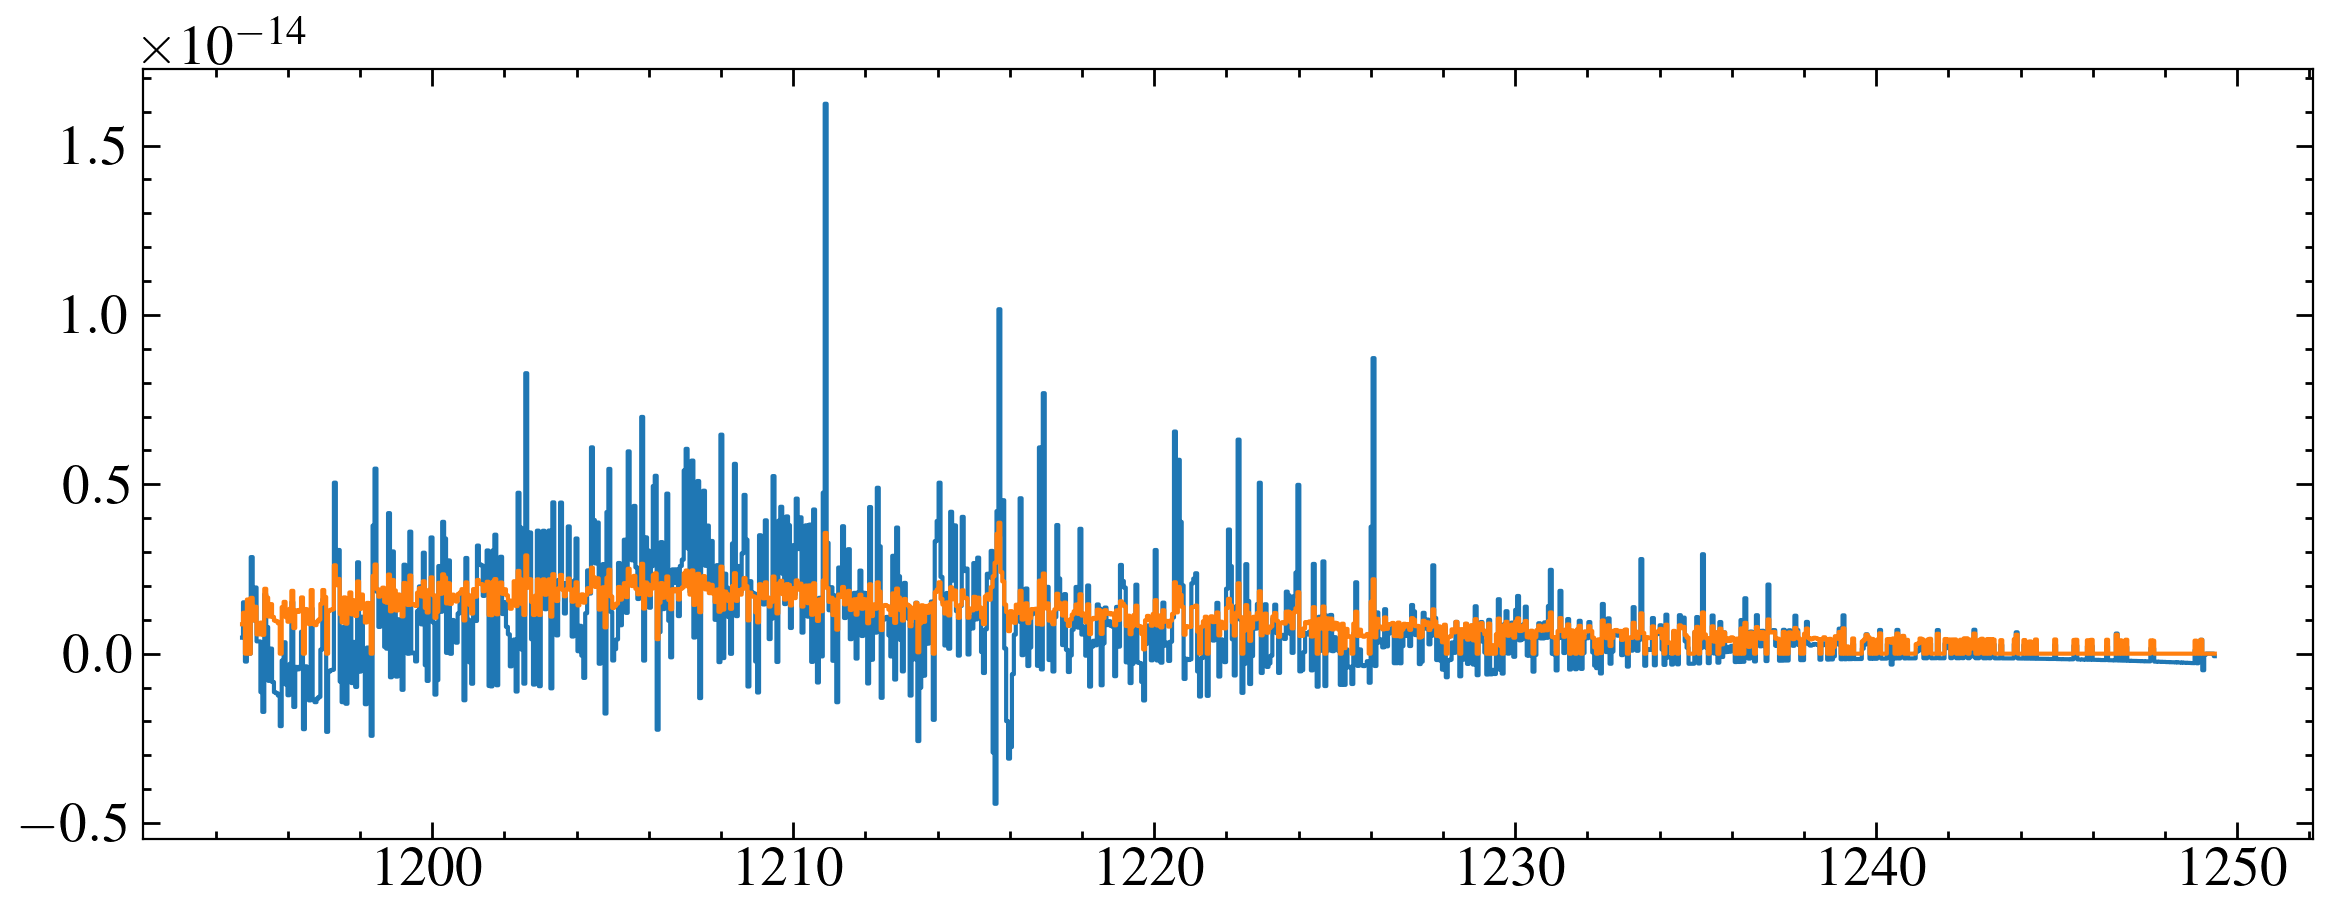

/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/ocy721040_x1d.fits
G140M
554.16


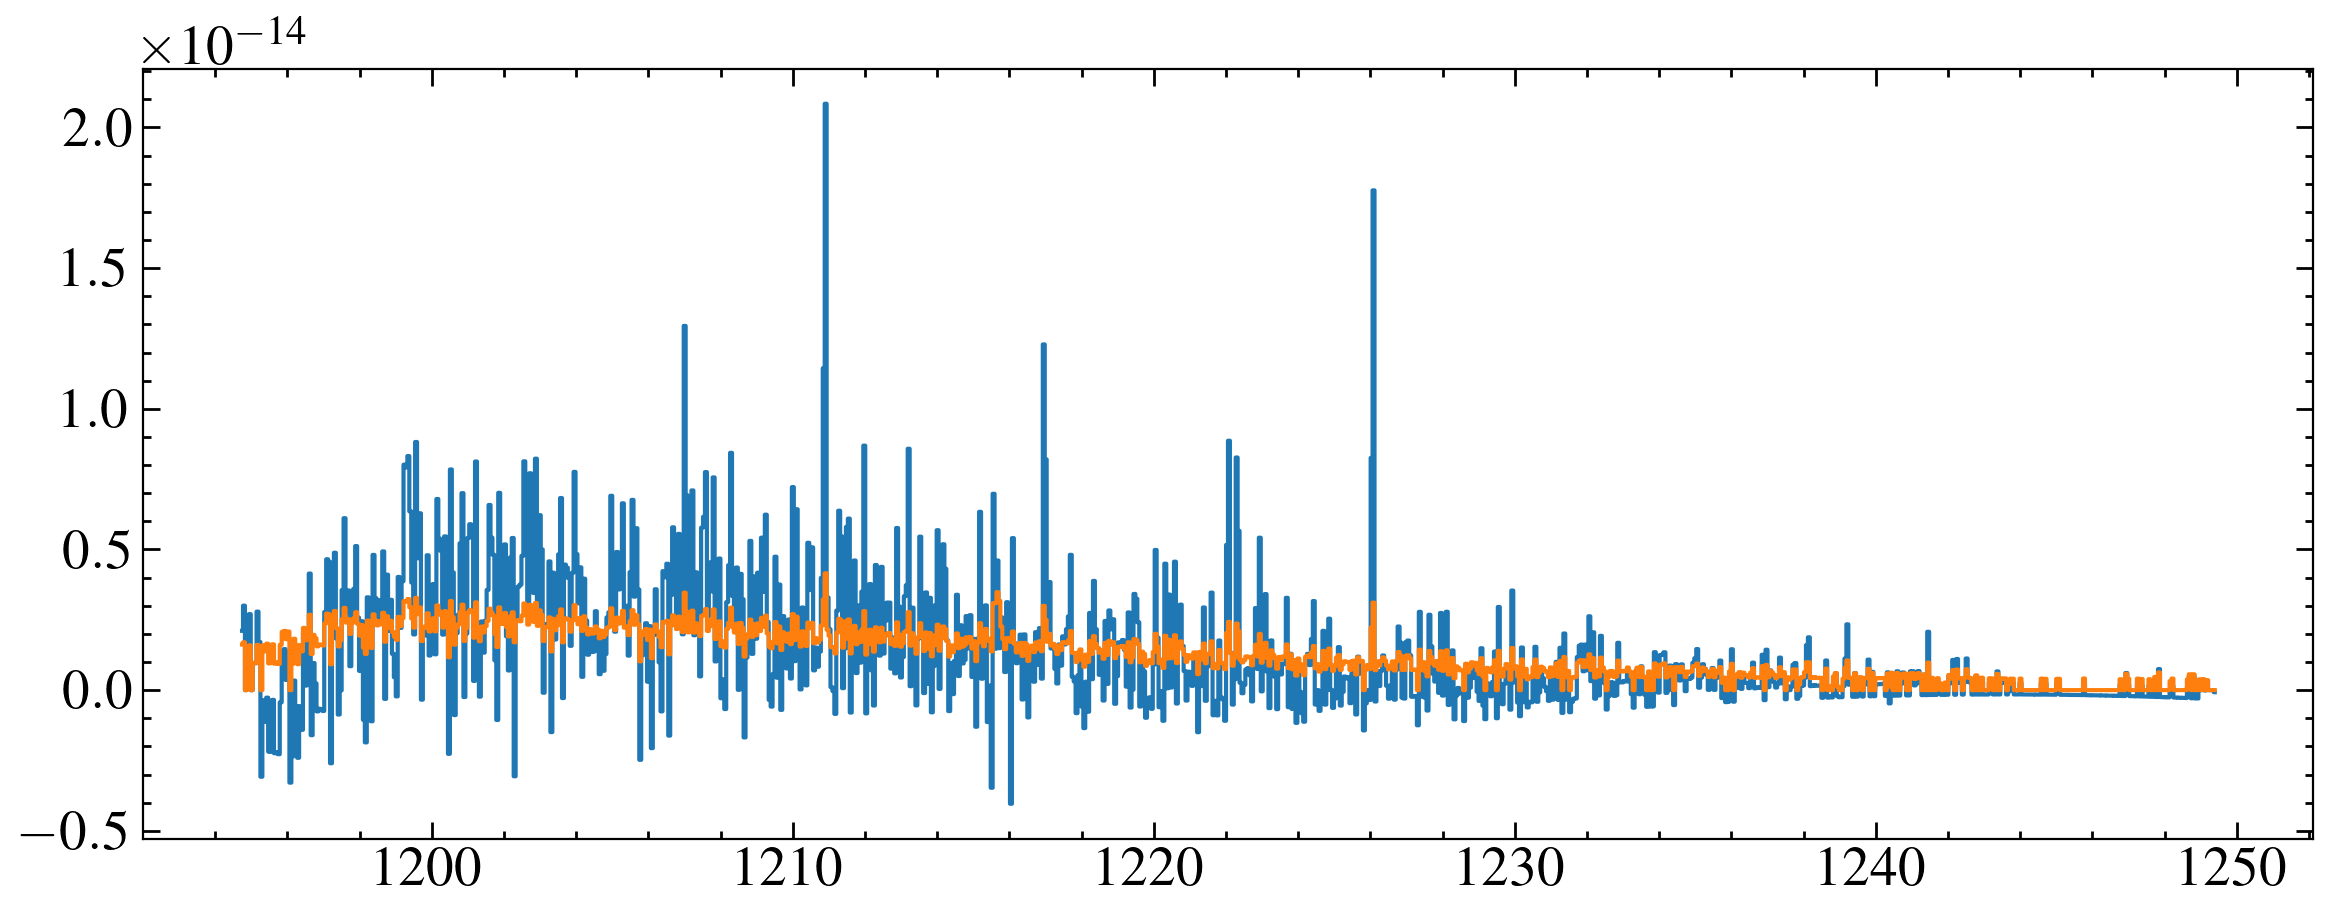

/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/oeoo18020_x1d.fits
G230L
579.05237


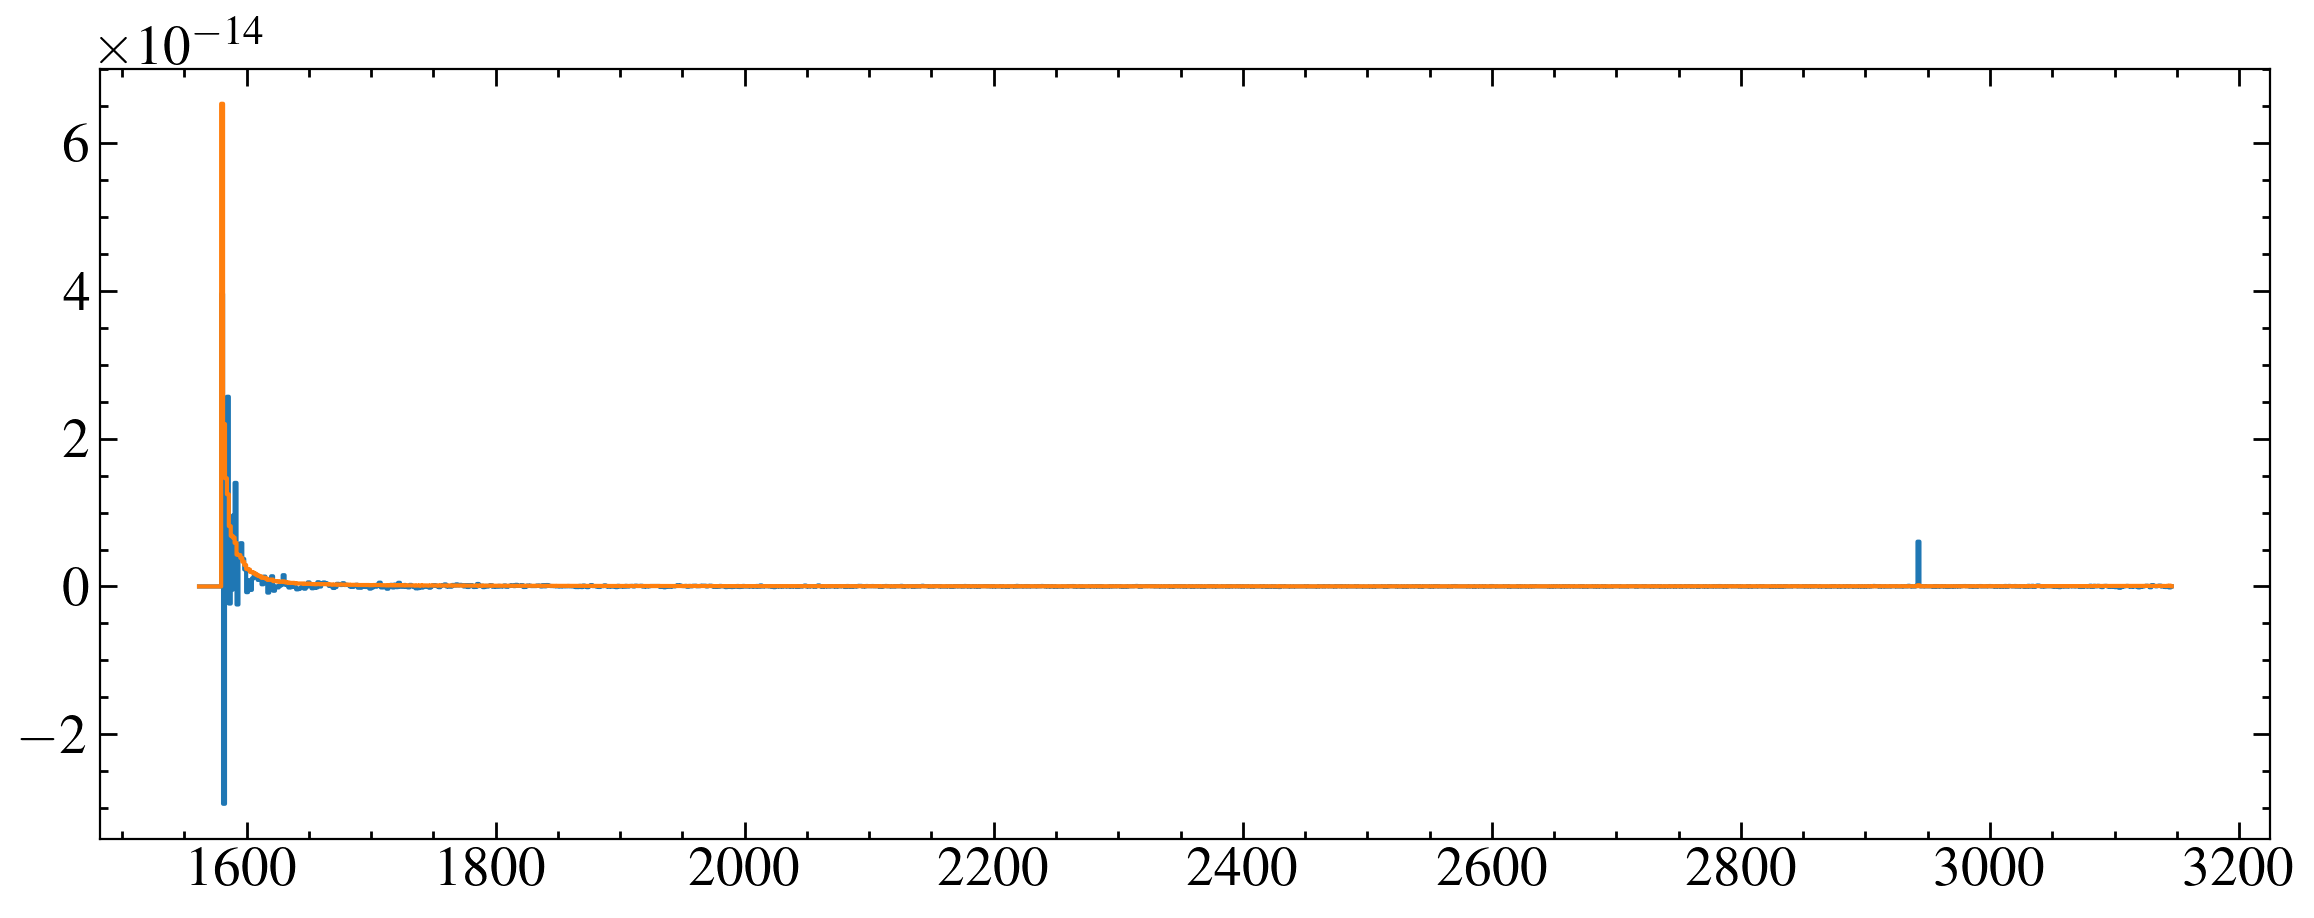

/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/oeoo18030_x1d.fits
G230L
579.08167


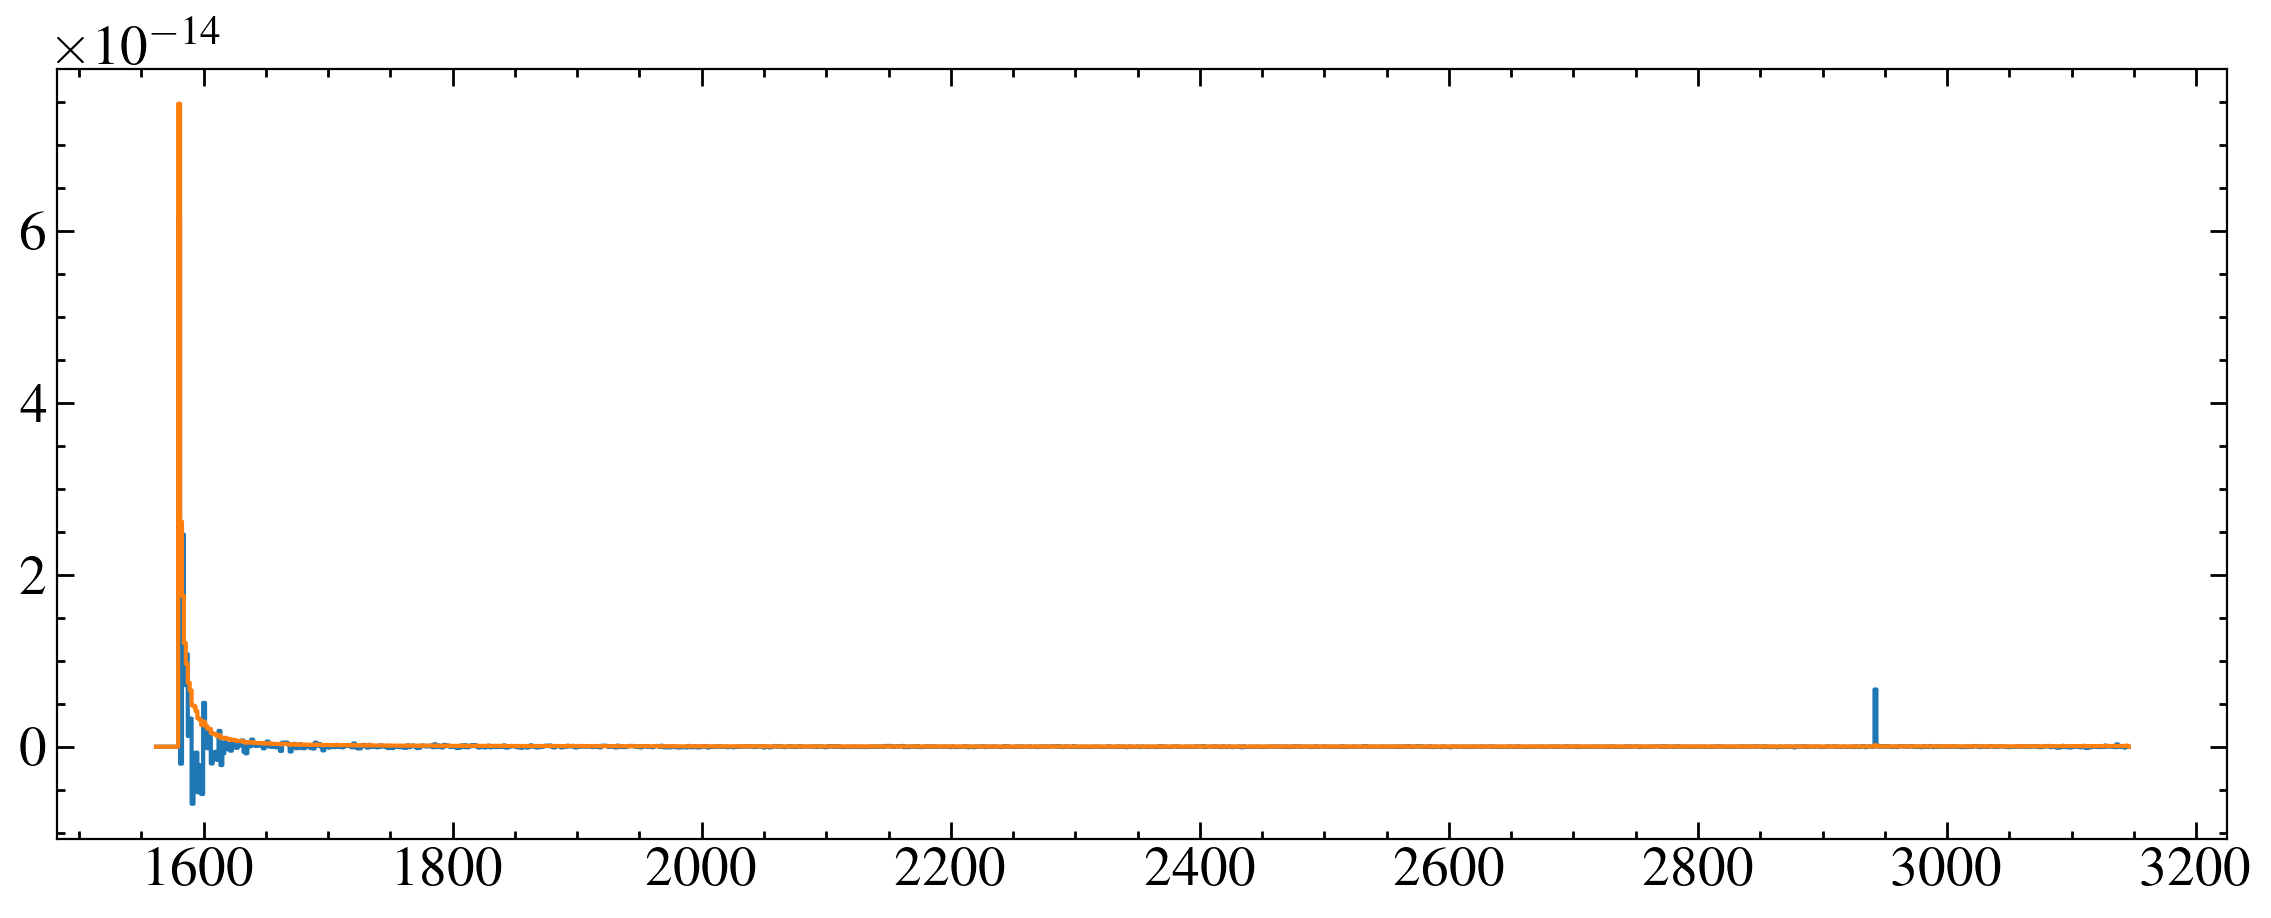

/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/oeoo18040_x1d.fits
G230L
534.12177


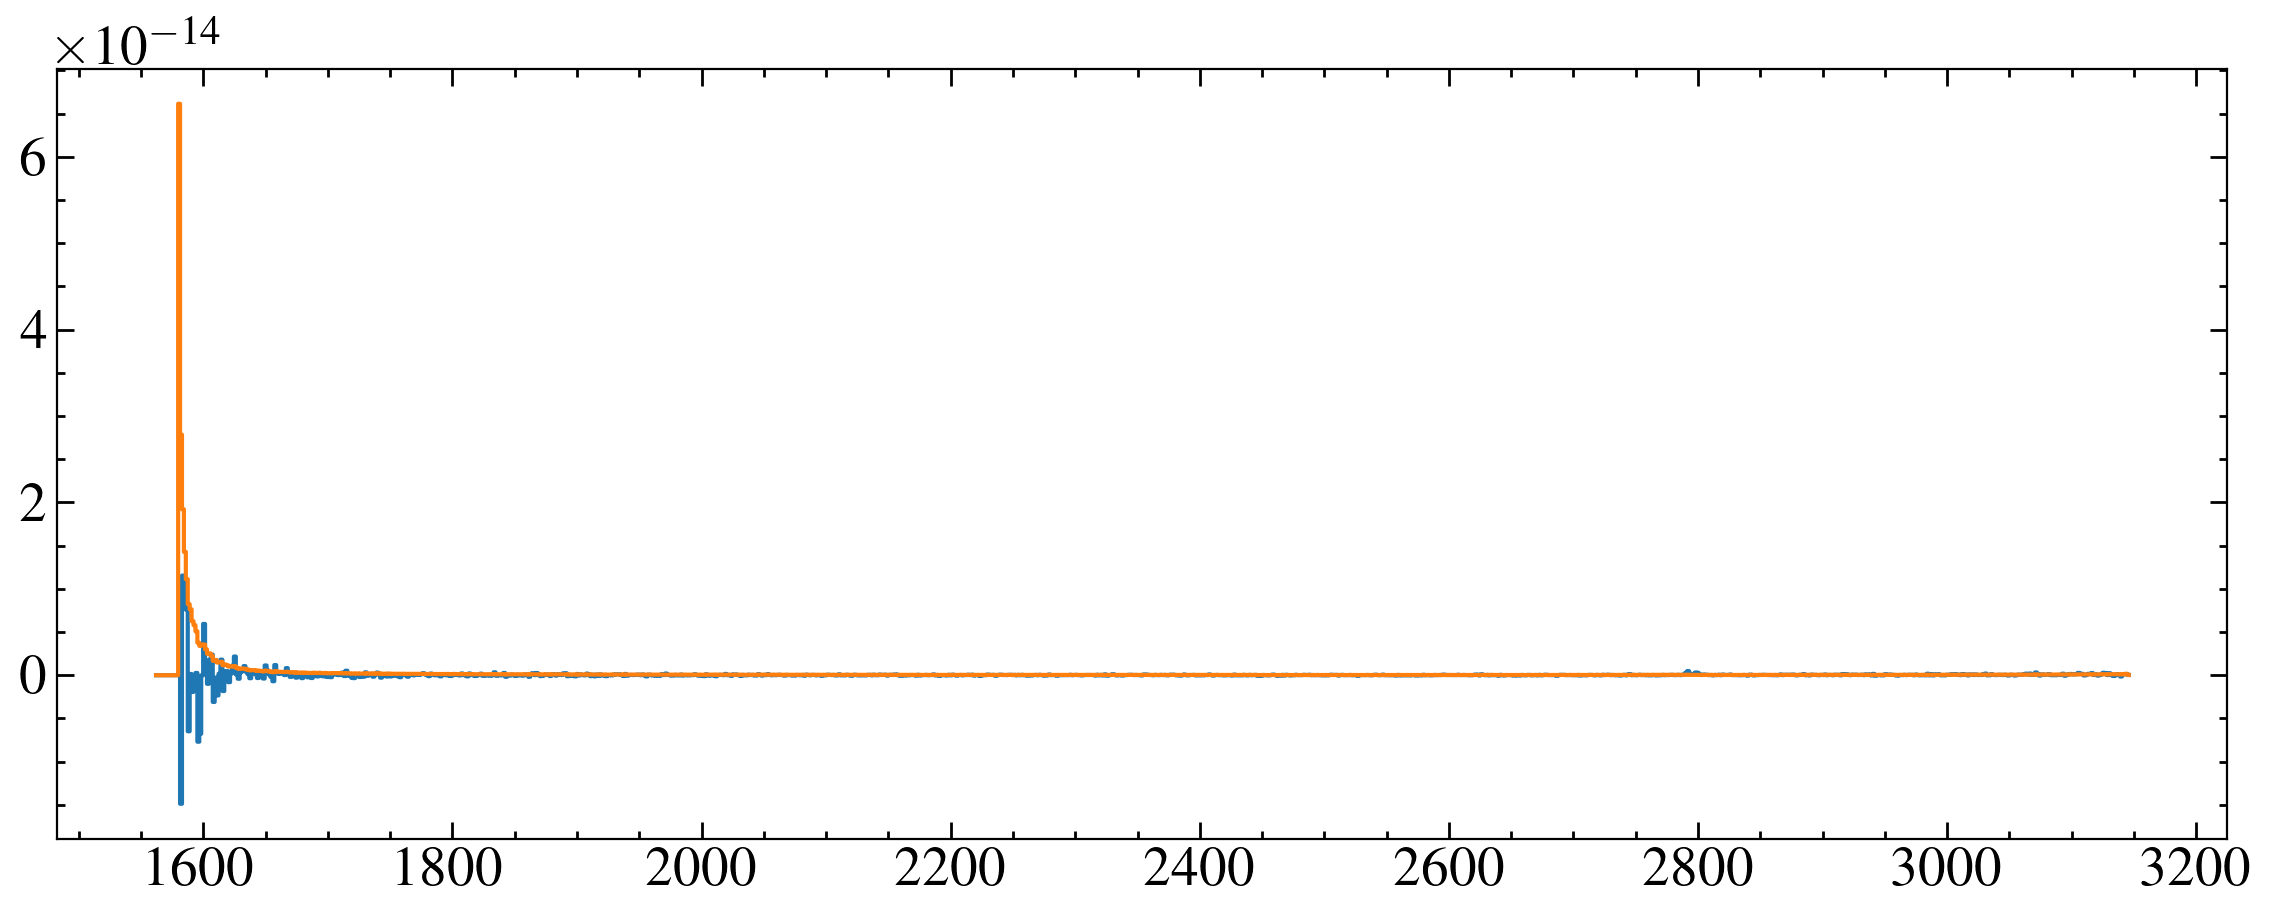

/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/oeoo38010_x1d.fits
G230L
511.13293


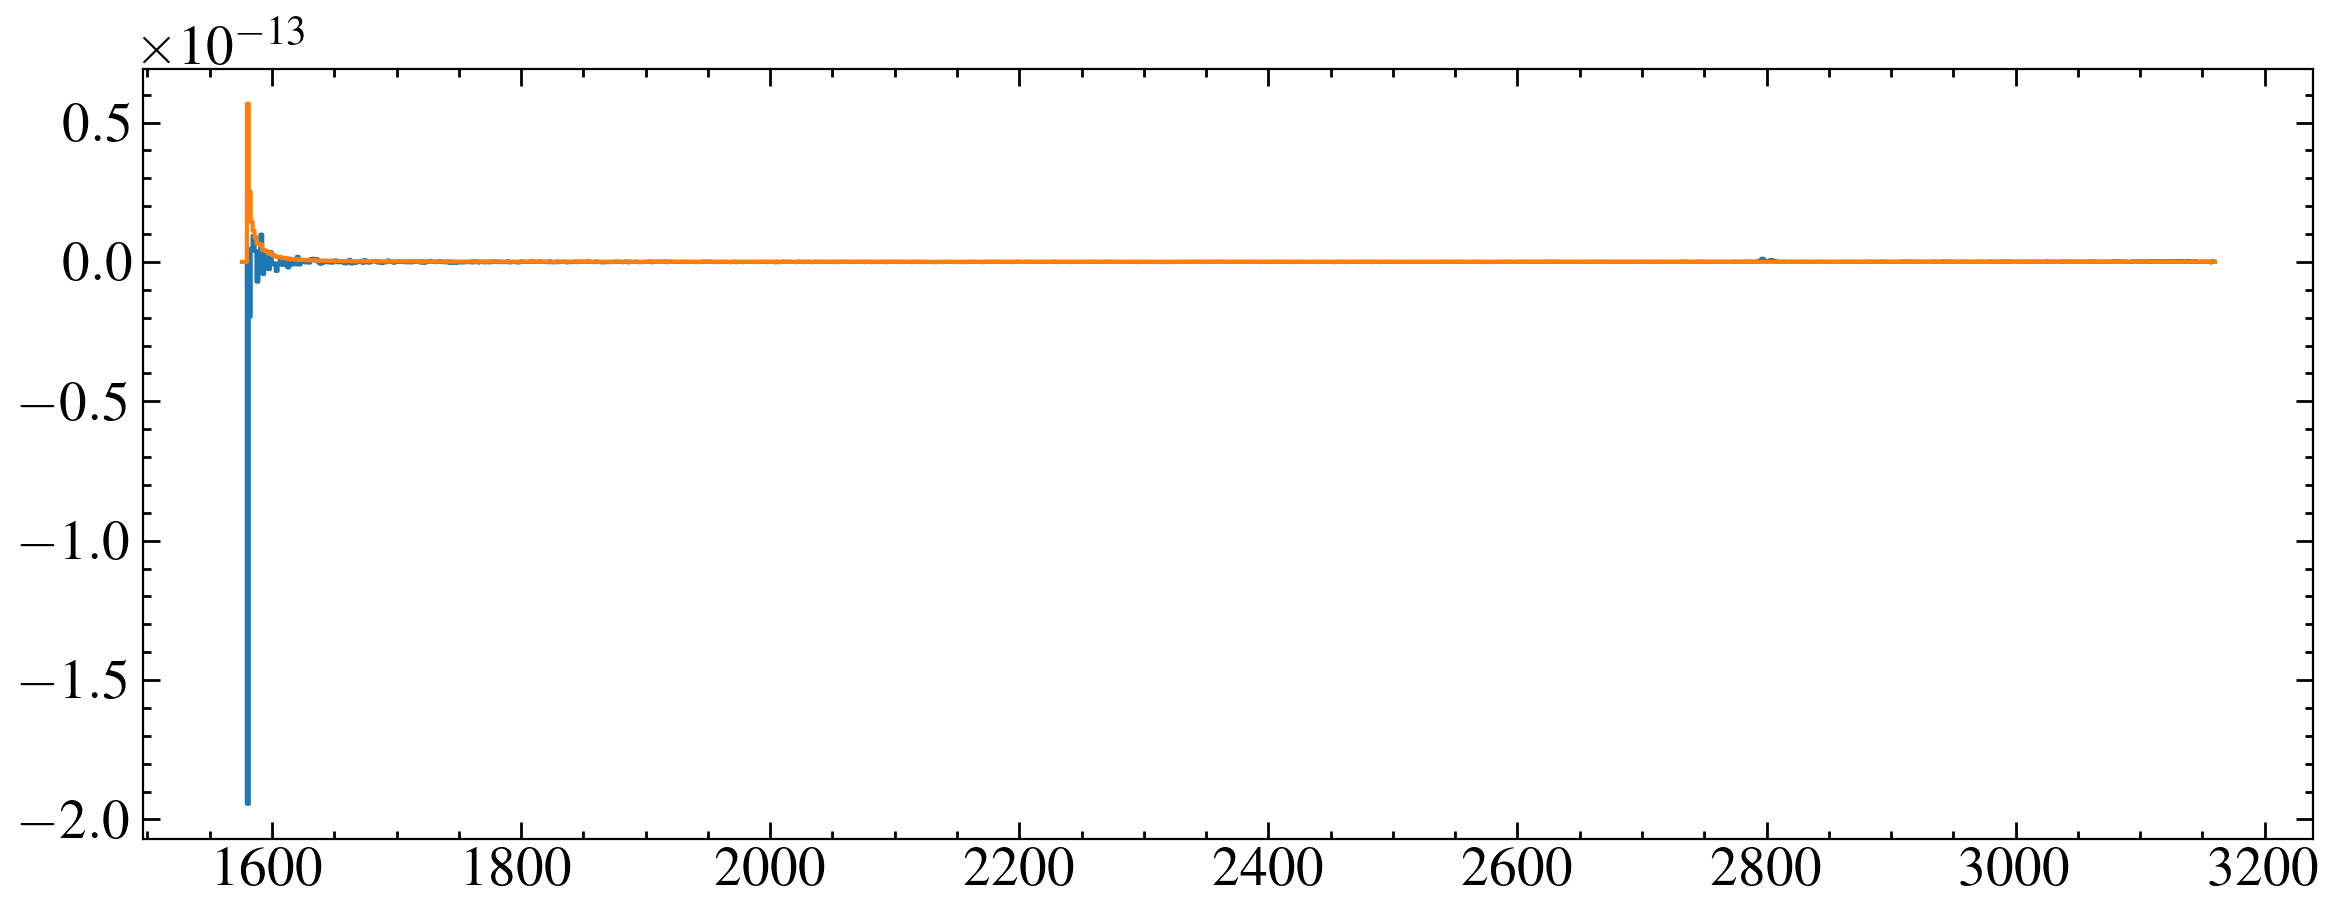

/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/ocy711010_x1d.fits
G140M
754.38135


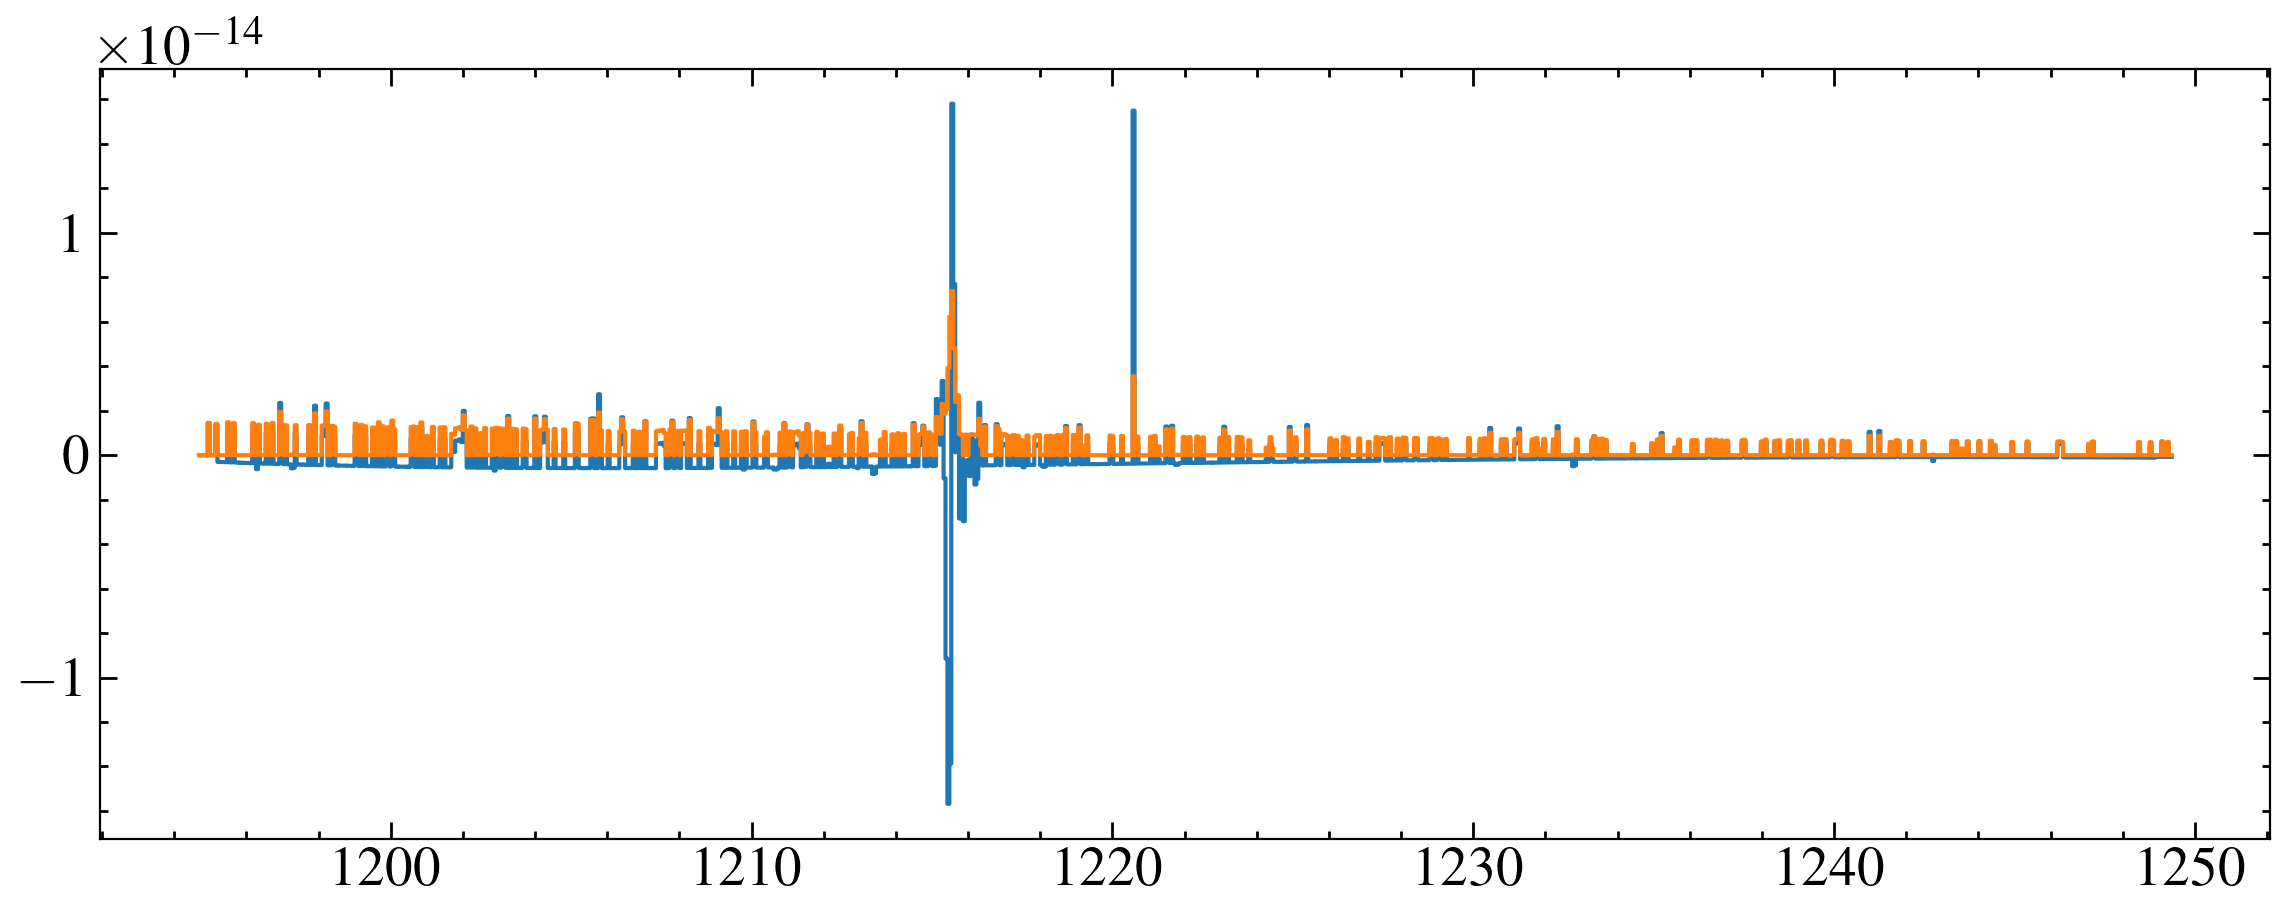

/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/ocy711020_x1d.fits
G140M
369.93082


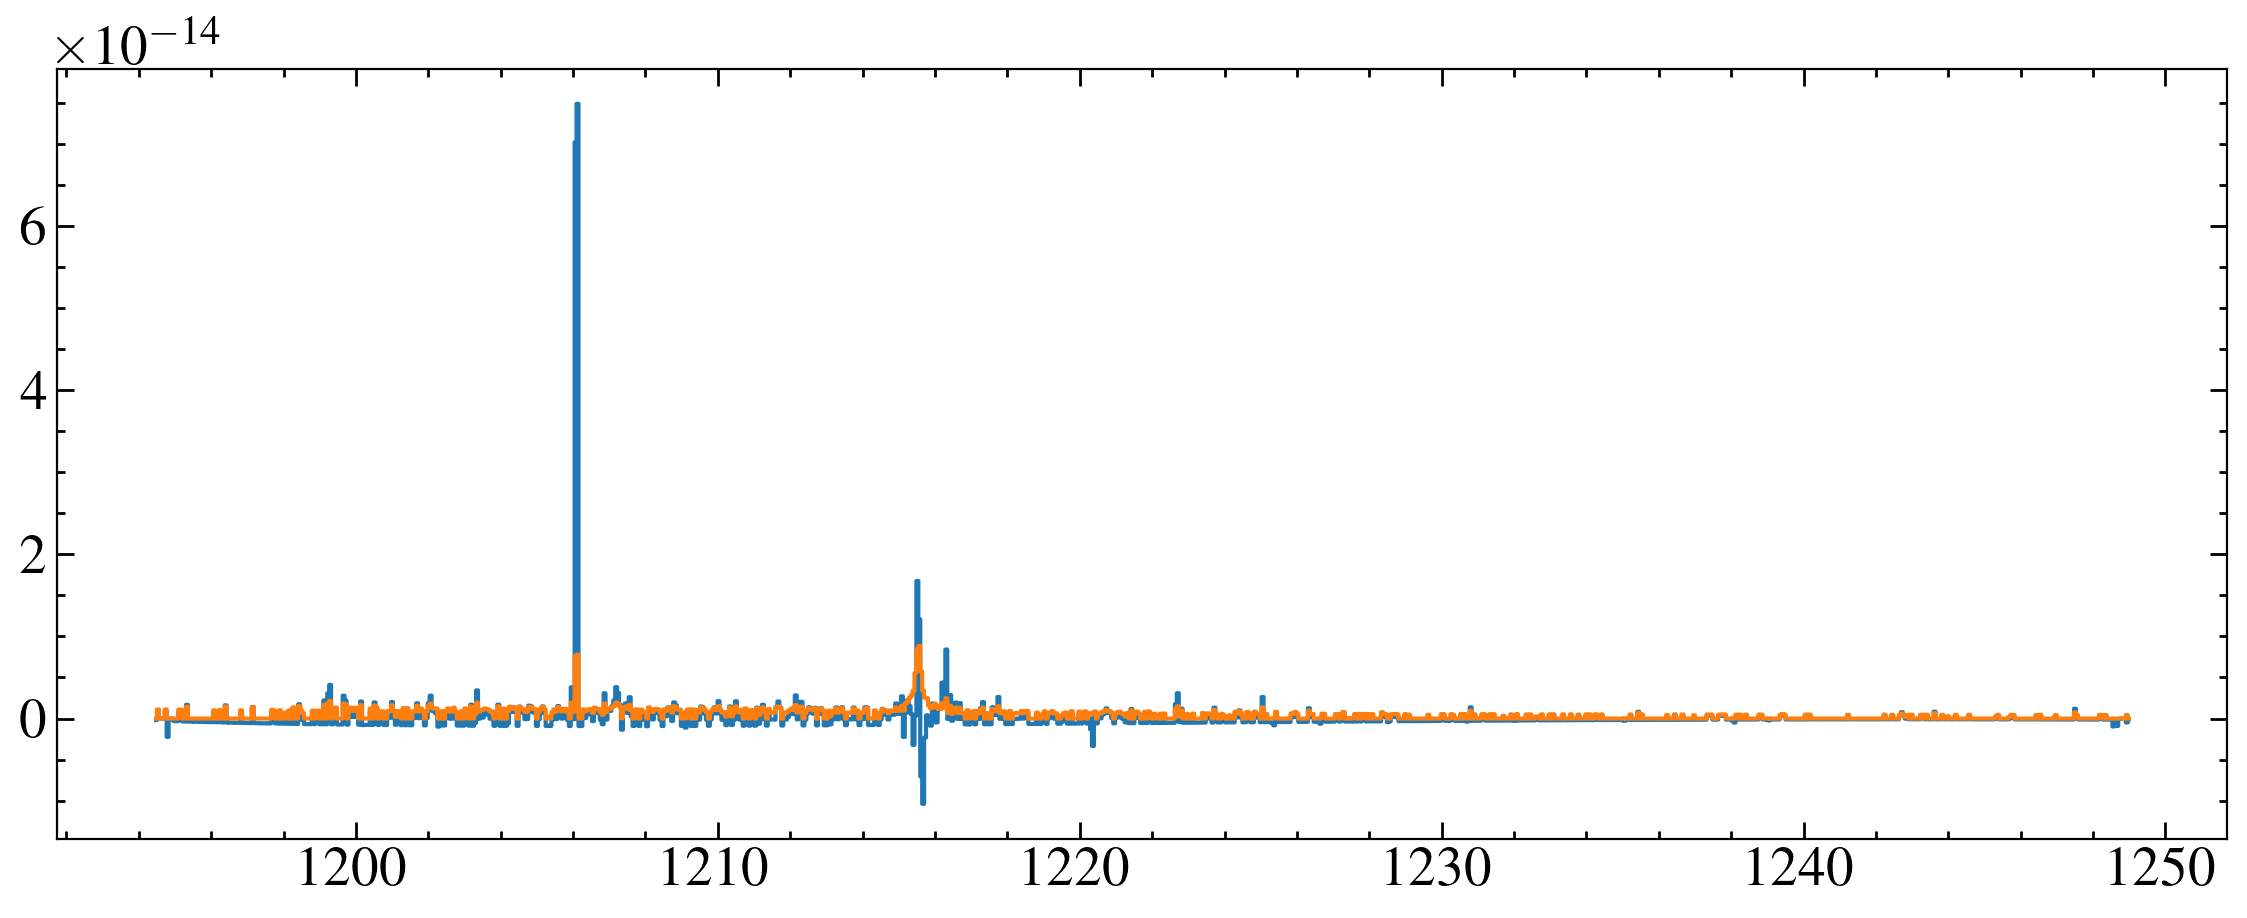

/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/oeoo18050_sx1.fits
G430L
892.3328


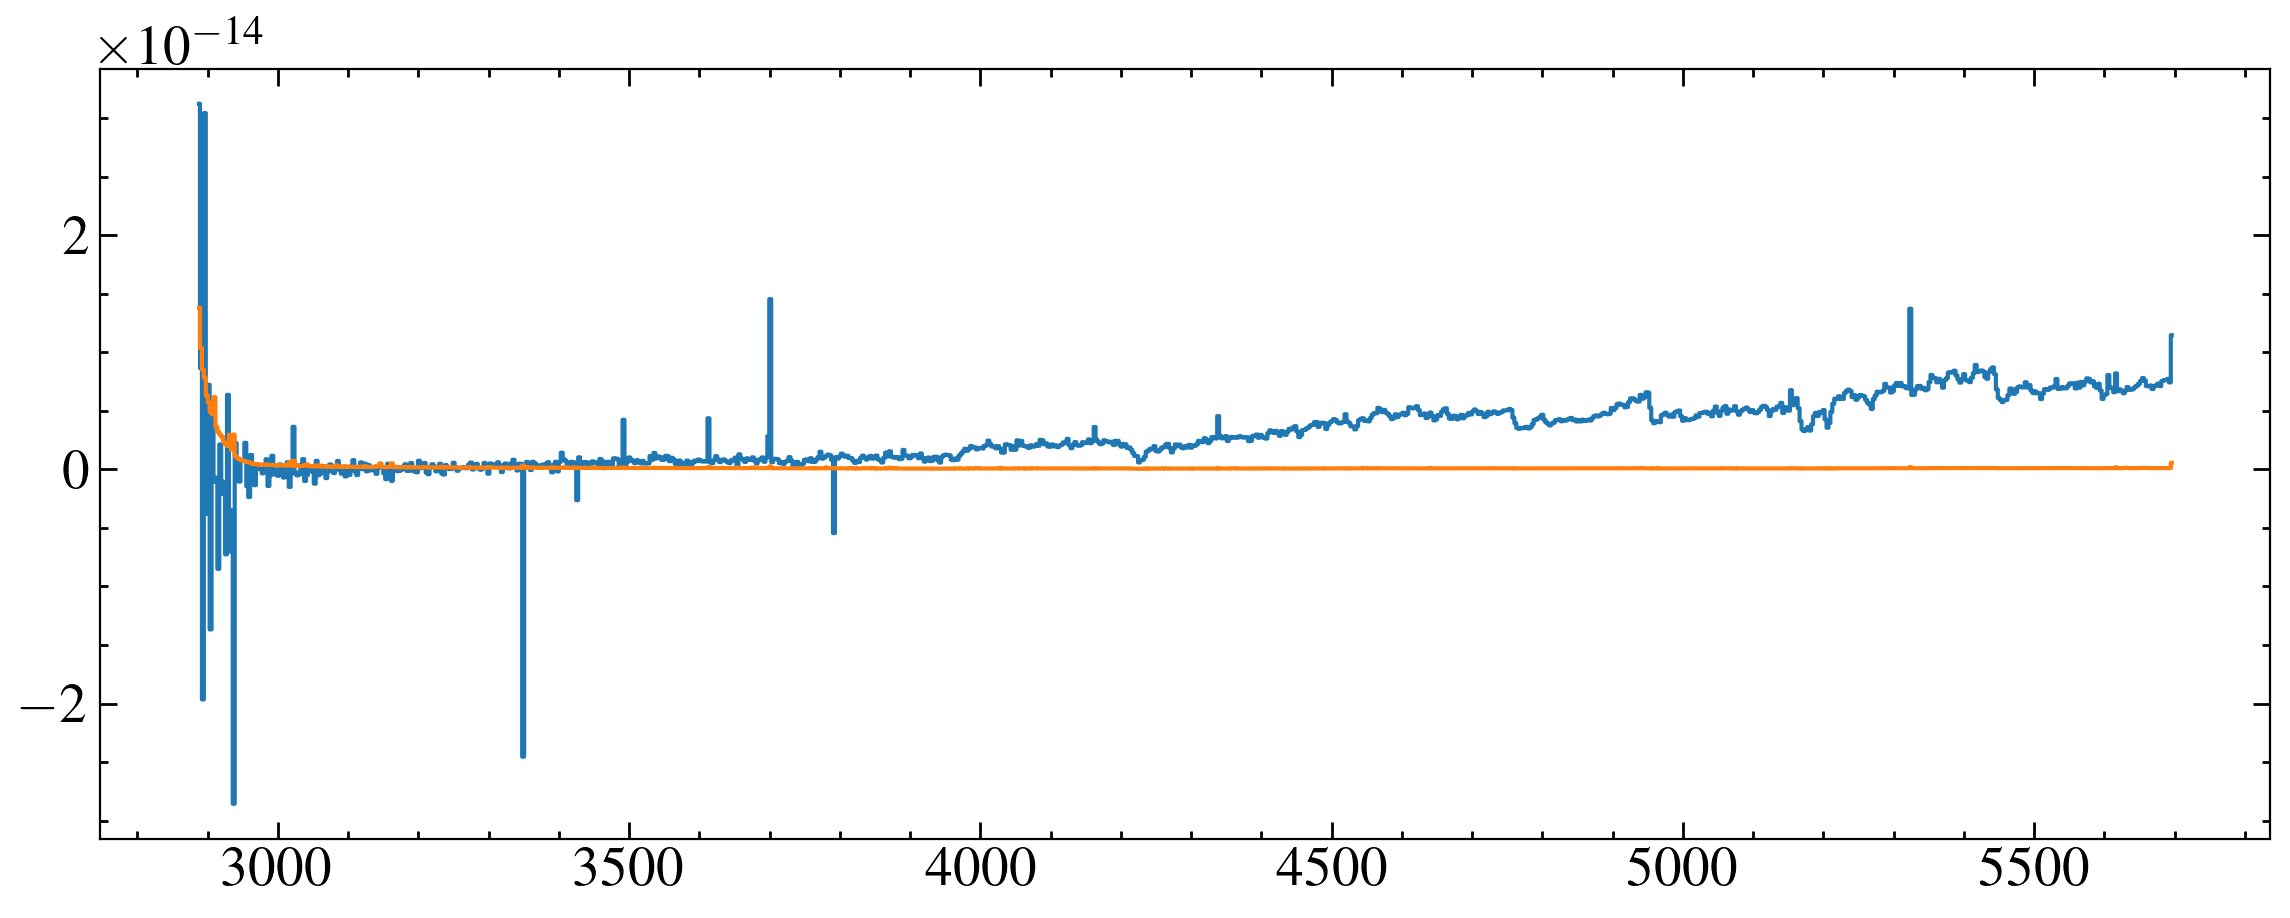

In [23]:
for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    plt.step(w, e, where='mid')
    plt.show()
    

In [13]:
import stistools
os.environ['oref'] = path 

In [17]:

# for root in  ['oeoo18020', 'oeoo18030']:

#     raw = '{}/{}_flt.fits'.format(path, root)
#     rootname = fits.getheader(raw)['ROOTNAME'] 
#     outname = 'reextractions/{}_new_x1d.fits'.format(rootname)
#     stistools.x1d.x1d(raw, output = outname, trailer='reextractions/{}_new.trl'.format(rootname), a2center=534, maxsrch=5)

533.82983


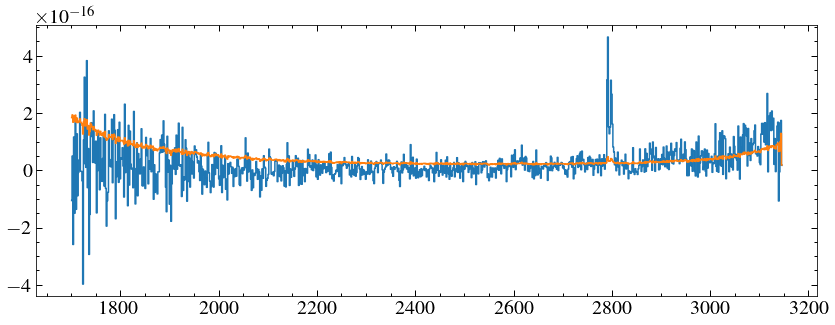

533.9306


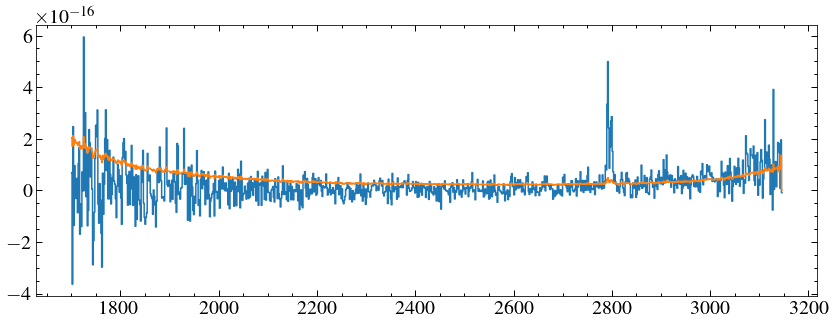

In [19]:
# for root in  ['oeoo18020', 'oeoo18030']:
#         data = fits.getdata('reextractions/{}_new_x1d.fits'.format(root), 1)[0]
#         print(data['A2Center'])
#         w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
#         w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
#         mask = w > 1700
#         w, f, e = w[mask], f[mask], e[mask]
#         plt.step(w, f, where='mid')
#         plt.step(w, e, where='mid')
#         plt.show()


In [20]:
# for x in x1ds:
#     print(x)
#     print(fits.getheader(x, 0)['OPT_ELEM'])
#     data = fits.getdata(x, 1)[0]
#     print(data['A2Center'])
#     w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
#     print(len(w), len(f), len(e))
#     print(len(e[np.isnan(e)==True]))
#     print(len(e[e< 0]))
#     mask = w > 1160 
#     w, f, e = w[mask], f[mask], e[mask]
#     print(len(w), len(f), len(e))
#     plt.step(w, f, where='mid')
#     # plt.step(w, e, where='mid')
#     # plt.show()
#     plt.yscale('log')
#     # plt.xscale('log')
#     # plt.xlim(2800, 3200)

In [7]:
def spectra_adder(f_array, e_array, scale_correct=True):
    """
    Returns a variance-weighted coadd with standard error of the weighted mean (variance weights, scale corrected).
    f_array and e_arrays are collections of flux and error arrays, which should have the same lenth and wavelength scale
    """
    weights = 1 / (e_array**2)
    flux = np.average(f_array, axis =0, weights = weights)
    var = 1 / np.sum(weights, axis=0)
    rcs = np.sum((((flux - f_array)**2) * weights), axis=0) / (len(f_array)-1) #reduced chi-squared
    if scale_correct:
        error = (var * rcs)**0.5
    else:
        error = var**2
    return flux,error

In [8]:
# x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/oeoo18020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/oeoo18030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/oeoo18040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/oeoo38010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/oeoo18050_sx1.fits'],
      dtype='<U65')

In [14]:
x1ds = np.array(['/home/david/work/meats/SEDs/reextractions/oeoo18020_new_x1d.fits',
       '/home/david/work/meats/SEDs/reextractions/oeoo18030_new_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/oeoo18040_x1d.fits',
                 '/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/oeoo38010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/k2-18/oeoo18050_sx1.fits'
                 ])

In [10]:
gratings = []
for x in x1ds:
    gratings.append(fits.getheader(x, 0)['OPT_ELEM'])
print(gratings)
    

['G230L', 'G230L', 'G230L', 'G430L', 'G230L']


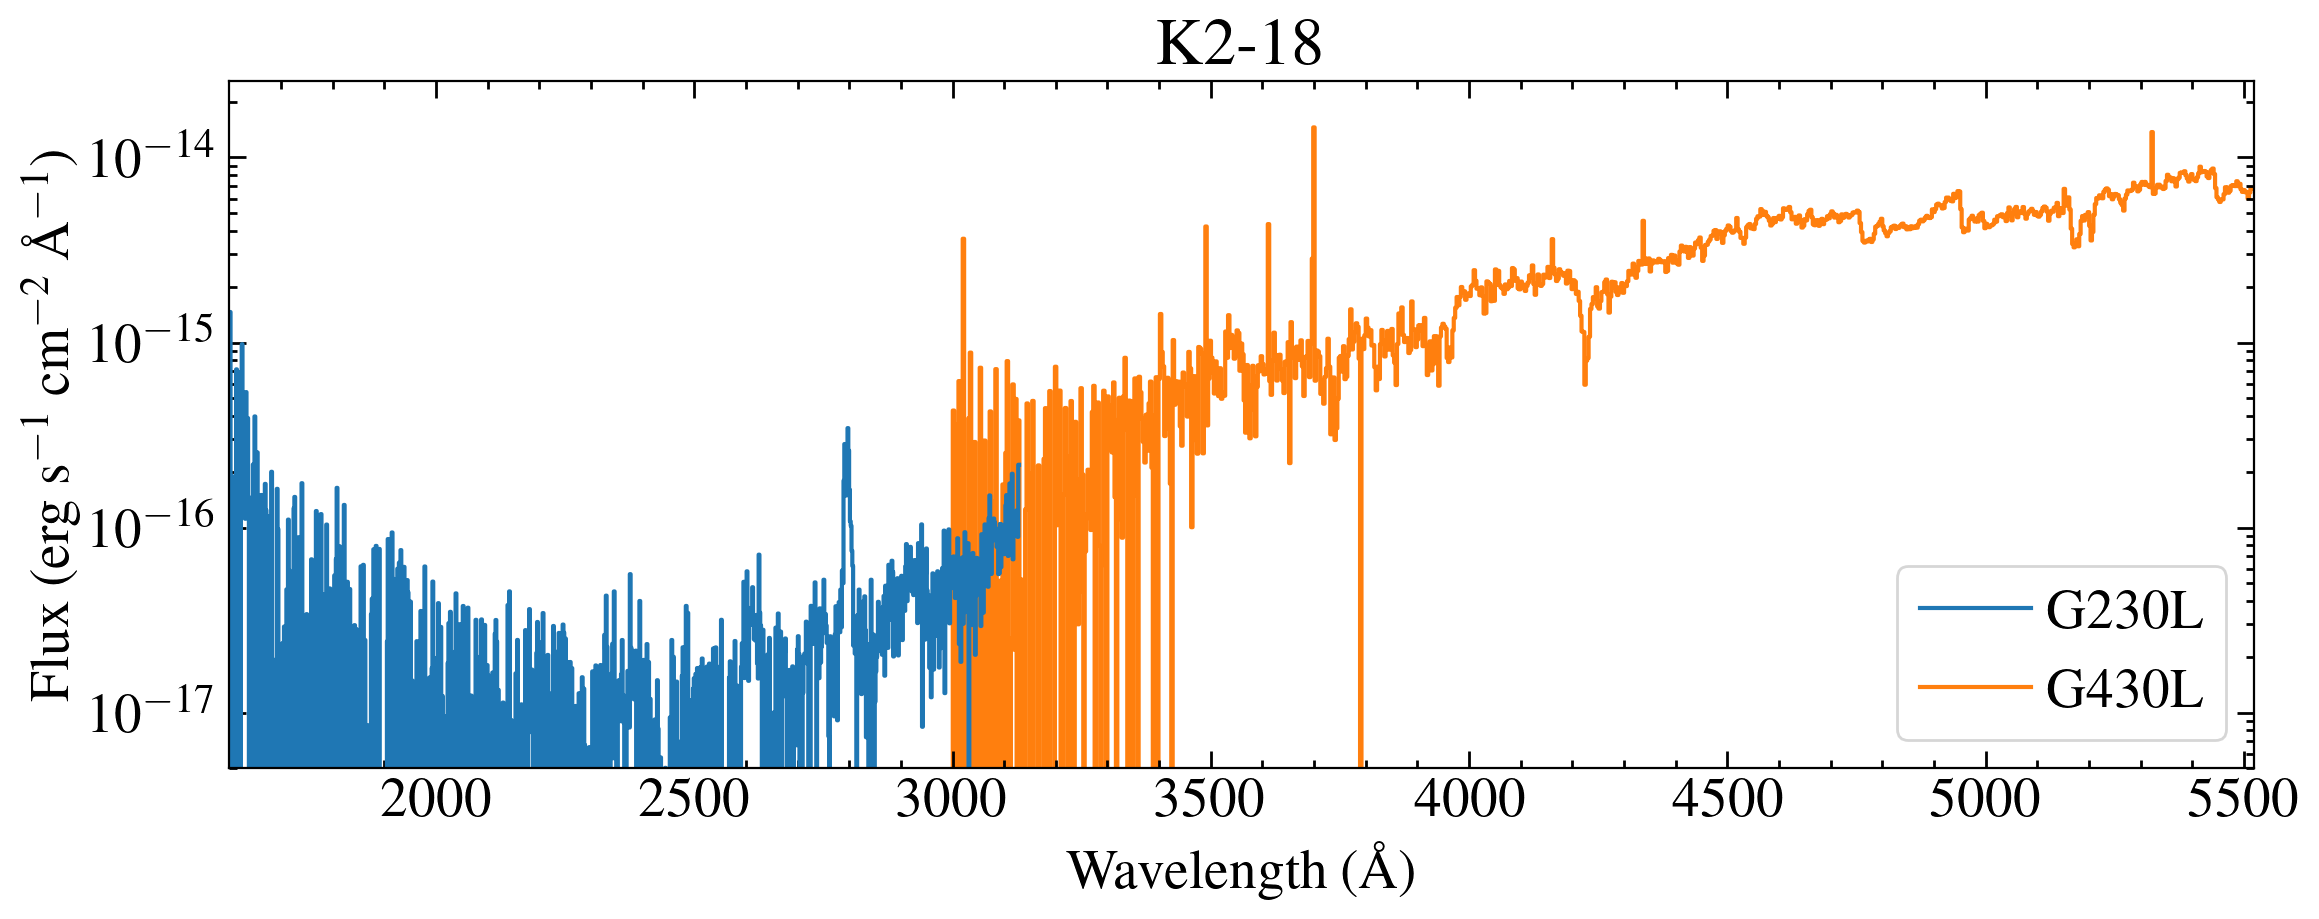

In [15]:
plt.figure(figsize=(12, 5))

f_nuv = []
e_nuv = []

n=0
for x in x1ds:
    data = fits.getdata(x, 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    grating = fits.getheader(x, 0)['OPT_ELEM']
    if grating == 'G230L':
        mask = (w > 1600) & (w <3130)
        w, f, e = w[mask], f[mask], e[mask]
        if n == 0:
            w_nuv = w
            f_nuv.append(f)
            e_nuv.append(e)
        else:
            f_nuv.append(interp1d(w, f, fill_value='extrapolate')(w_nuv))
            e_nuv.append(interp1d(w, e, fill_value='extrapolate')(w_nuv))            
        n +=1
    # if grating == 'G230L':
    #     mask = (w > 1700) & (w <3130)
    #     w_nuv, f_nuv, e_nuv = w[mask], f[mask], e[mask]
    if grating == 'G430L':
        mask = (w > 3000) & (w <5520)
        w_opt, f_opt, e_opt = w[mask], f[mask], e[mask]
        
f_nuv, e_nuv = spectra_adder(np.array(f_nuv), np.array(e_nuv), scale_correct=True)

# plt.step(w_fuv, f_fuv, label='G140L')
plt.step(w_nuv, f_nuv, label='G230L')
plt.step(w_opt, f_opt, label='G430L', zorder=-1)

plt.yscale('log')
# plt.xscale('log')
plt.ylim(5e-18)
plt.xlim(1600, 5520)
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend(frameon=True, loc=4)
plt.title('K2-18')
plt.tight_layout()
plt.savefig('plots/k2-18_ql.pdf')
plt.savefig('plots/k2-18_ql.png', facecolor='w')

/tmp/ipykernel_13320/3441878235.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,1,i+1)


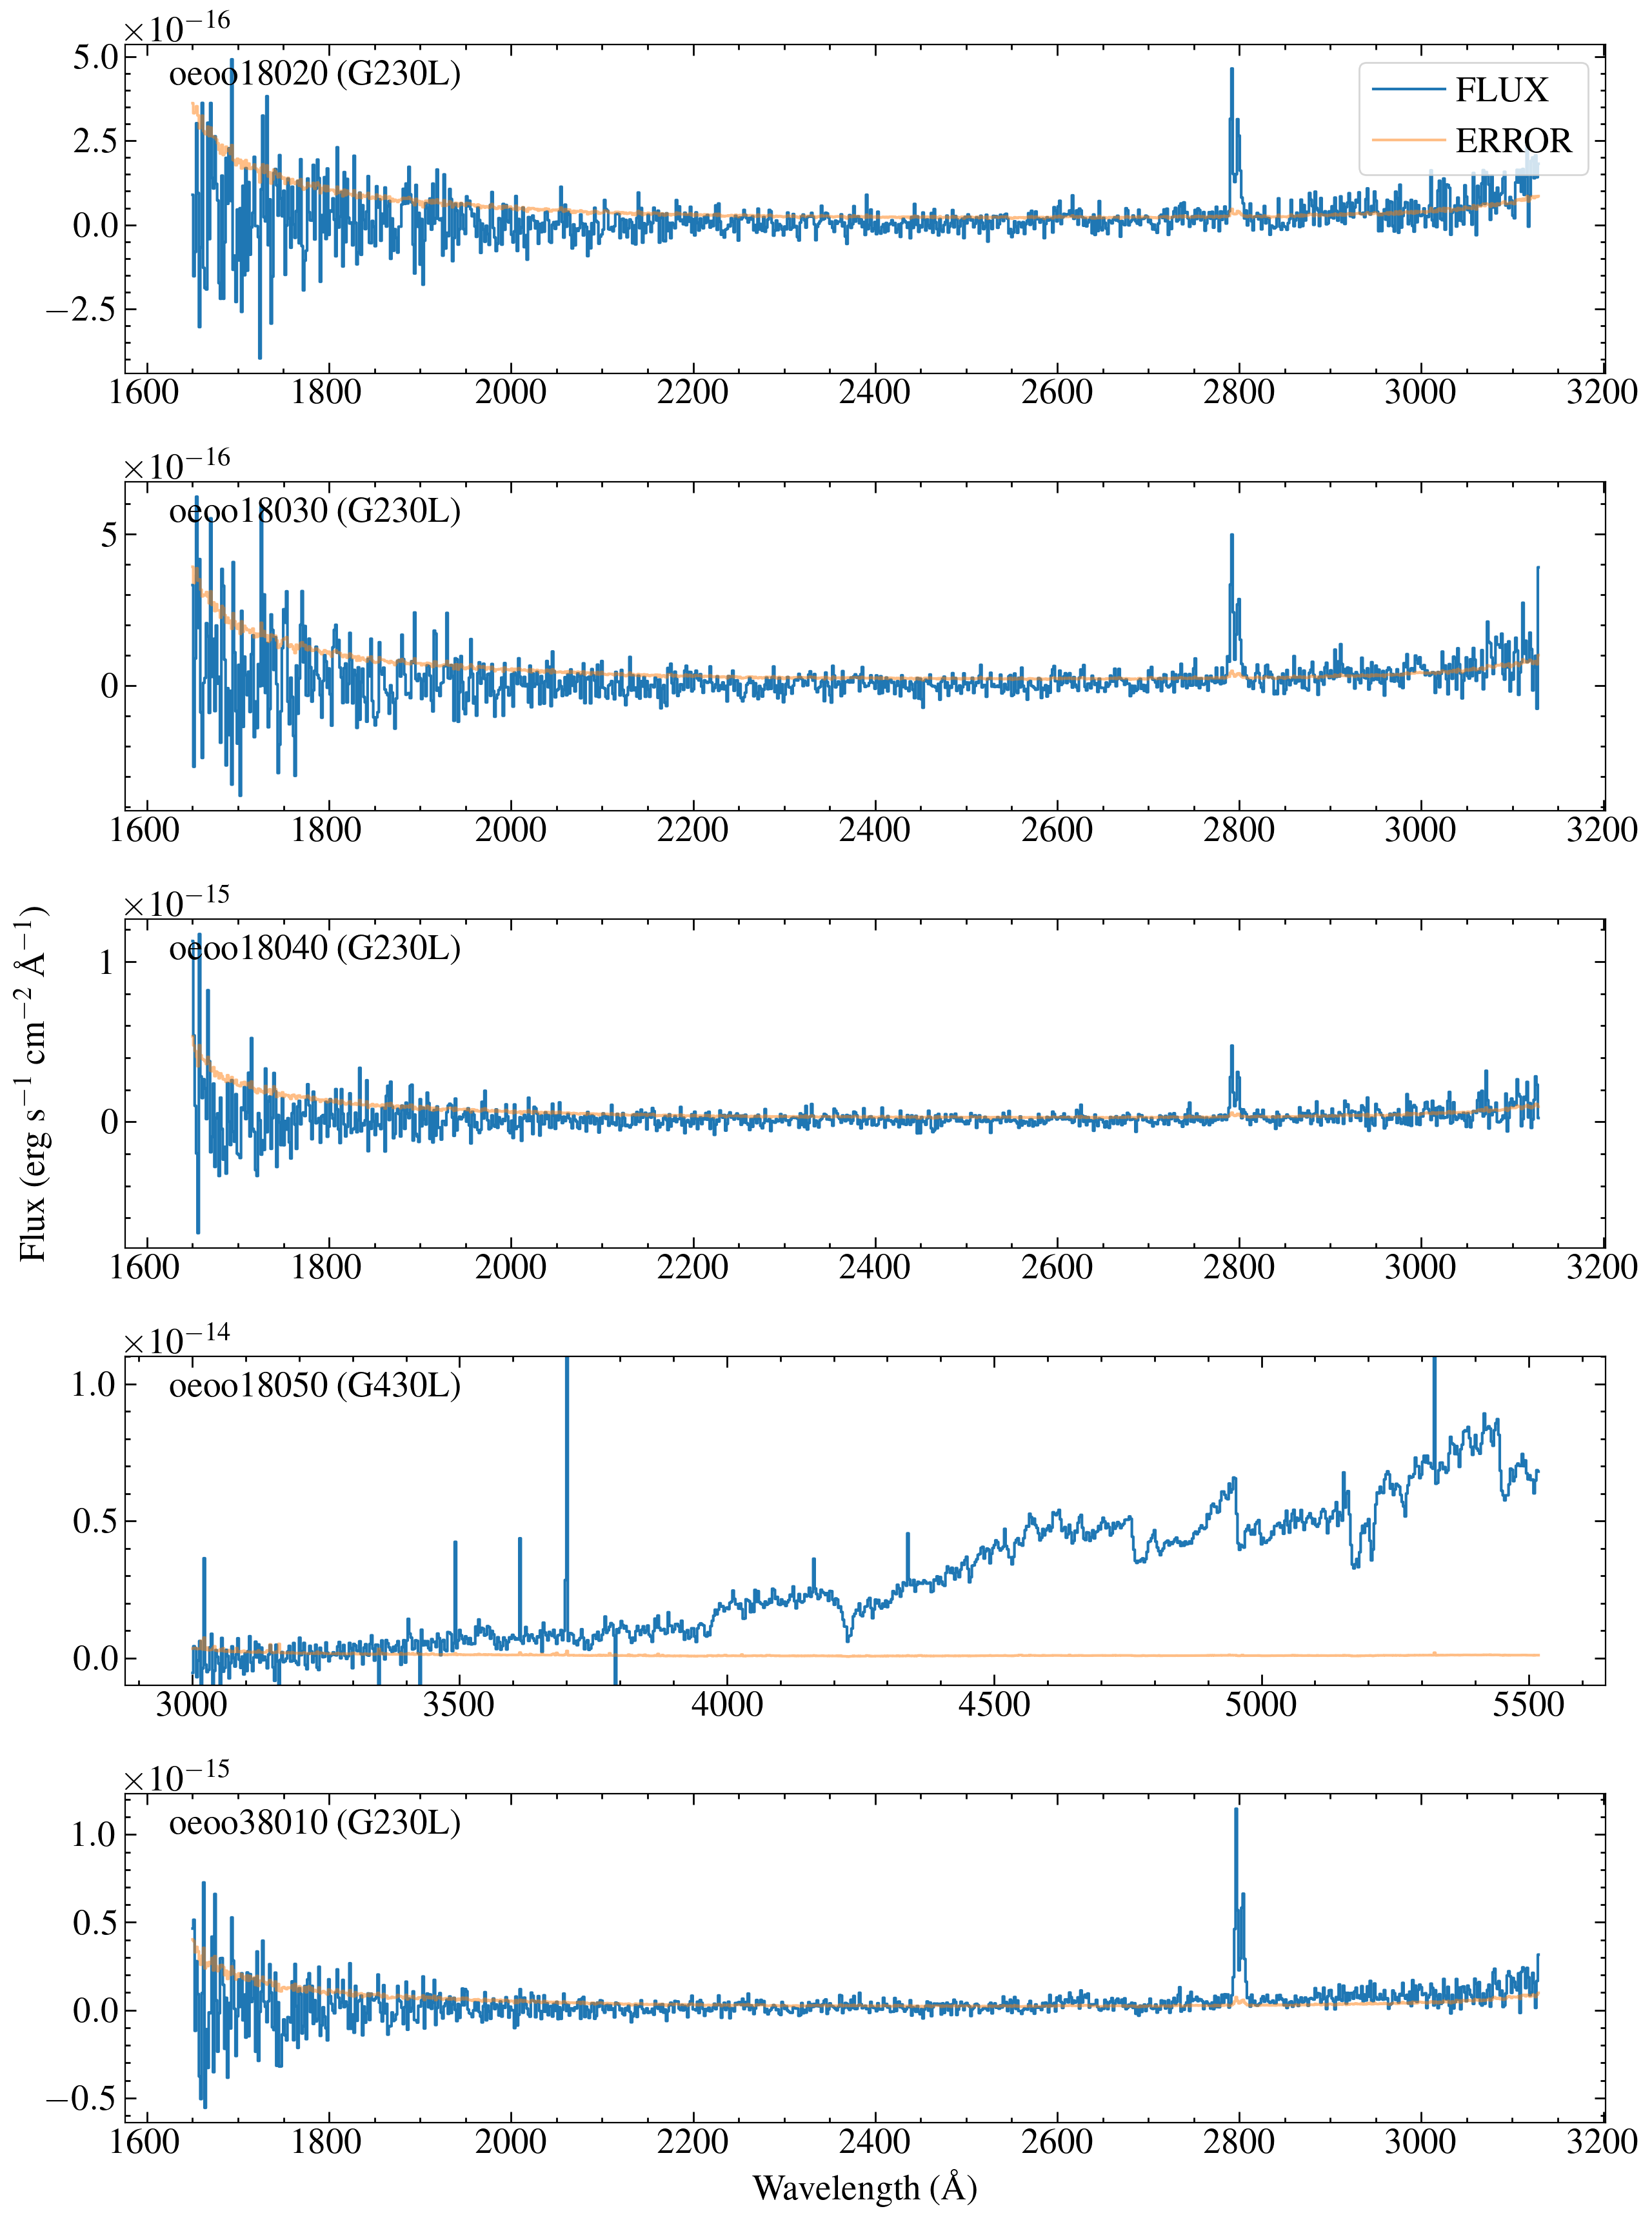

In [13]:
fig, axes = plt.subplots(figsize=(14, 18))

for i, x in enumerate(x1ds):
    plt.subplot(5,1,i+1)
    # print(x)
    # print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)[0]
    hdr = fits.getheader(x, 0)
    grating, root = hdr['OPT_ELEM'], hdr['ROOTNAME']
    # print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating == 'G140L':
        mask = (w > 1160)
        plt.ylim(-1e-16, 1.1e-15)
    if grating == 'G230L':
        mask = (w > 1650) & (w <3130)
    if grating == 'G430L':
        mask = (w > 3000) & (w <5520)
        plt.ylim(-1e-15, 1.1e-14)
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', label='FLUX')
    plt.step(w, e, where='mid', alpha=0.5, label='ERROR')
    # if i < len(x1ds)-1: 
        # plt.xticks(visible=False)
    if i == 0:
        plt.legend(frameon=True, loc=1)
    plt.annotate('{} ({})'.format(root, grating), (0.03, 0.95), xycoords='axes fraction', ha='left', va='top')
        
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20, labelpad=12)
plt.xlabel('Wavelength (\AA)')
plt.tight_layout()
# plt.subplots_adjust(hspace=0.1)

plt.savefig('plots/k2-18_all_stis.pdf')
plt.savefig('plots/k2-18_all_stis.png', facecolor='w')
    # plt.show()
    

(-5e-17, 6e-16)

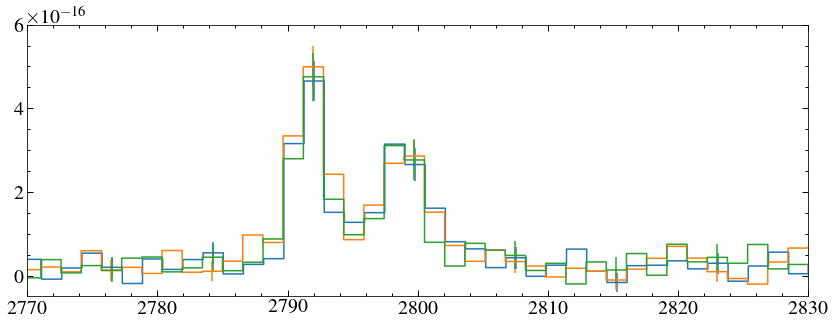

In [63]:
for x in x1ds:
    data = fits.getdata(x, 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    grating = fits.getheader(x, 0)['OPT_ELEM']
    if grating == 'G230L':
        mask = (w > 1700) & (w <3130)
        w, f, e = w[mask], f[mask], e[mask]
        # plt.step(w, f, where='mid', label='FLUX')
        plt.errorbar(w, f, yerr=e, drawstyle='steps-mid', errorevery=5)
plt.xlim(2770, 2830)
plt.ylim(-0.5e-16, 6e-16)